# Задание 06. Статистические методы отбора признаков
### Задание 1: Отбор признаков с использованием корреляционных матриц.
Для начала, используйте датасет о винах из sklearn.datasets. Найти корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с помощью seaborn.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def lin_reg(selected_features, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return mean_squared_error(y_test, y_pred)

def logistic_reg(selected_features, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y)
  model = LogisticRegression(max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return accuracy_score(y_test, y_pred)


In [ ]:
wine = load_wine()
wine_X = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_y = wine.target
wine_X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
wine_df = wine_X.copy()
wine_df['sort'] = wine_y
corr = wine_df.corr()["sort"].drop('sort')
selected_features = corr.abs().sort_values(ascending=False).head(5).index
selected_features

Index(['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols',
       'proline', 'hue'],
      dtype='object')

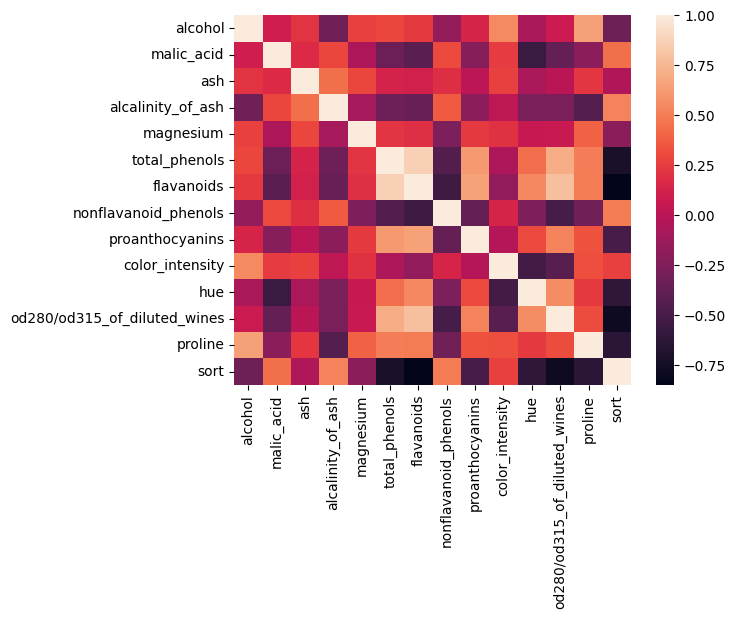

In [ ]:
sns.heatmap(wine_df.corr(numeric_only=True))
plt.show()

In [ ]:
logistic_reg(selected_features, wine_X, wine_y)

0.9555555555555556

### Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
Используйте тот же датасет и подгоните модель RandomForestRegressor к вашим данным, затем используйте атрибут feature_importances_ чтобы определить наиболее важные признаки.

In [ ]:
model = RandomForestRegressor()
model.fit(wine_X, wine_y)

important_features = model.feature_importances_
selected_features = pd.Series(important_features, index=wine_X.columns).sort_values().head(5)
selected_features

,0
nonflavanoid_phenols,0.000331
total_phenols,0.001123
malic_acid,0.001949
proanthocyanins,0.001957
ash,0.003132


In [ ]:
logistic_reg(selected_features.index, wine_X, wine_y)

0.7333333333333333

###  Задание 3: Использование выбора признаков на основе p-value.
   Для этого задания можно использовать набор данных Boston Housing из sklearn.datasets.

In [ ]:
boston = pd.read_csv("HousingData.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


##### Построение p-value для признаков в регрессии
Когда считаем p-value для признаков в линейной модели, проверяем, насколько правдоподобно наблюдать оценку коэффициента при условии, что истинное влияние признака равно нулю.

##### Расчёт p-value:

$$ H_0: \text{гипотеза об отсутствии эффекта} $$
$$ H_1: \text{альтернативная гипотеза} $$

$$ \text{Статистика теста: } T = \frac{\hat{\beta} - \beta_0}{SE(\hat{\beta})} $$

$$ p\text{-value} = P\big(|Z| \geq |T|\big) \quad \text{при } Z \sim \mathcal{N}(0,1) $$

##### Интерпретация:
$$
\begin{cases}
p < \alpha \quad \Rightarrow \quad \text{отвергаем } H_0 \\
p \geq \alpha \quad \Rightarrow \quad \text{нет оснований отвергать } H_0
\end{cases}
$$

##### Обозначения:
$$
\beta_j \;-\; \text{истинный коэффициент при признаке } X_j
$$

$$
\hat{\beta}_j \;-\; \text{оценка коэффициента, полученная методом наименьших квадратов}
$$

$$
SE(\hat{\beta}_j) \;-\; \text{стандартная ошибка оценки коэффициента}
$$

$$
\beta_0 \;=\; 0 \quad \text{(значение коэффициента при нулевой гипотезе)}
$$

$$
T_j \;-\; \text{t-статистика для проверки значимости признака } X_j
$$


In [ ]:
boston_drop = boston.dropna()
boston_X = boston_drop.drop("MEDV", axis=1)
boston_y = boston_drop["MEDV"]
boston_X_const = sm.add_constant(boston_X)
model = sm.OLS(boston_y, boston_X_const).fit()
pvals = model.pvalues
selected_features = pvals[pvals < 0.05].sort_values()
selected_features

,0
RM,5.178141e-18
LSTAT,1.191566e-13
DIS,2.025662e-11
PTRATIO,2.441813e-10
const,1.813521e-08
NOX,2.868704e-05
RAD,4.553787e-05
ZN,7.542543e-04
TAX,9.748234e-04
B,1.251180e-03


In [ ]:
lin_reg(selected_features.index.drop('const'), boston_X , boston_y)

25.34626106543468

### Задание 4: Отбор признаков с помощь метода взаимной информации.
   Используйте любой датасет, с которым вам приятно работать. Установите библиотеку sklearn и примените функцию mutual_info_classif или mutual_info_regression для отбора признаков.

##### Взаимная информация

$$
\text{Mutual Information (MI)} \;=\; I(X;Y) \;=\; \sum_{x \in X} \sum_{y \in Y} p(x,y) \, \log \frac{p(x,y)}{p(x)\,p(y)}
$$

##### Классификация:
$$
\text{mutual\_info\_classif} \;\; \Rightarrow \;\; I(X_j;Y), \quad Y \in \{1,2,\dots,K\}
$$
$$
\text{Оценивает зависимость признака } X_j \text{ и класса } Y
$$

##### Регрессия:
$$
\text{mutual\_info\_regression} \;\; \Rightarrow \;\; I(X_j;Y), \quad Y \in \mathbb{R}
$$
$$
\text{Оценивает зависимость признака } X_j \text{ и непрерывной целевой переменной } Y
$$

##### Интерпретация:
$$
I(X_j;Y) = 0 \;\; \Rightarrow \;\; \text{признак не даёт информации о целевой} \\
I(X_j;Y) > 0 \;\; \Rightarrow \;\; \text{признак информативен для предсказания}
$$


In [ ]:
mi_scores = mutual_info_classif(wine_X, wine_y)
mi_df = pd.DataFrame(mi_scores, wine_X.columns)
mi_df = mi_df.sort_values(mi_df.columns[0])
selected_features = mi_df.head(5).index
mi_df

,0
ash,0.083781
nonflavanoid_phenols,0.117774
magnesium,0.215414
alcalinity_of_ash,0.246042
malic_acid,0.271976
proanthocyanins,0.283011
total_phenols,0.415253
alcohol,0.474500
hue,0.481699
od280/od315_of_diluted_wines,0.501955


In [ ]:
logistic_reg(selected_features, wine_X, wine_y)

0.6888888888888889

### Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
   Постройте модель, например, линейную регрессию или SVM, и используйте RFE для выбора лучшего подмножества признаков.


Что делает RFE
- Строит модель на всех признаках.
- Удаляет наименее важный признак (по весам модели).
- Повторяет процесс, пока не останется заданное число признаков.
- В результате получаем лучшее подмножество признаков для данной модели.

In [ ]:
model = SVC(kernel="linear")
selector = RFE(model)
selector = selector.fit(wine_X, wine_y)
selected_features = wine_X.columns[selector.support_]
selected_features

Index(['alcohol', 'ash', 'flavanoids', 'nonflavanoid_phenols',
       'color_intensity', 'od280/od315_of_diluted_wines'],
      dtype='object')

In [ ]:
logistic_reg(selected_features, wine_X, wine_y)

0.8888888888888888

### Задание 6: Сравните различные методы отбора признаков.
Примените каждый из методов отбора признаков к одному и тому же датасету, а затем сравните производительность моделей машинного обучения, обученных на этих различных подмножествах признаков.